# Part One

In [1]:
with open("input.txt", "r") as f:
    claims = [l.strip() for l in f]

In [7]:
claims[0:3]

['#1 @ 661,227: 29x11', '#2 @ 391,45: 27x20', '#3 @ 467,241: 23x12']

In [20]:
import numpy as np

left = np.array([int(c.split('@')[1].split(',')[0]) for c in claims])
top = np.array([int(c.split(':')[0].split(',')[1]) for c in claims])
width = np.array([int(c.split(':')[1].split('x')[0]) for c in claims])
height = np.array([int(c.split(':')[1].split('x')[1]) for c in claims])

In [21]:
#Just checking I didn't screw up the parsing
for i in np.random.choice(range(len(claims)), 5, replace=False):
    print claims[i]
    params = []
    for param in [left, top, width, height]:
        params.append(param[i])
    print params 

#825 @ 90,42: 27x12
[90, 42, 27, 12]
#513 @ 924,625: 21x11
[924, 625, 21, 11]
#788 @ 556,758: 25x18
[556, 758, 25, 18]
#880 @ 239,802: 25x28
[239, 802, 25, 28]
#878 @ 528,175: 15x14
[528, 175, 15, 14]


In [54]:
# Create canvas
vertical_range = top+height
horizontal_range = left+width
canvas = np.zeros((np.max(vertical_range), np.max(horizontal_range)))

In [55]:
for claim_id in range(len(claims)):
    x = left[claim_id]
    y = top[claim_id]
    w = width[claim_id]
    h = height[claim_id]
    
    canvas[y:y+h,x:x+w] += 1

In [59]:
overlap_canvas = np.zeros_like(canvas)
overlap_canvas[canvas>1] = 1 
print (np.sum(overlap_canvas))

110546.0


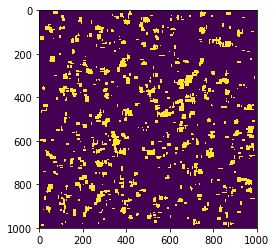

In [64]:
# Plotted it out for fun
from matplotlib import pyplot as plt
plt.figure()
plt.imshow(overlap_canvas)
plt.show()

# Part Two 

In [63]:
for claim_id in range(len(claims)):
    x = left[claim_id]
    y = top[claim_id]
    w = width[claim_id]
    h = height[claim_id]
    
    if np.sum(canvas[y:y+h, x:x+w]) == w*h:
        print (claim_id+1)

819
